# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

In [7]:
pip install Tensorflow 

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [ ]:
#so here is installing tenserflow 
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1- Read tic-tac-toe.csv into a DataFrame
df = pd.read_csv("tic-tac-toe.csv") # df original dataframe 


# 2. Inspect the dataset
print("\n🔍 First 5 rows of the dataset:\n") # nice function for the title with emoji
print(df.head())  # Print first 5 rows
print("\n📊 Dataset Info:\n")
print(df.info())
print(df["class"].value_counts()) #The last column (class) tells us if Player X wins >True or not >False.

# Step 3: Convert categorical values to numeric
# Encoding 'x' = 1, 'o' = -1, 'b'=  0
#Encoded = {'x': 1, 'o': -1, 'b': 0}  # Using 'Encoded' instead of 'mapping'
#for col in df.columns[:-1]:  # Apply to first 9 columns
 #   df[col] = df[col].map(Encoded)


# Encode the class column ('True' -> 1, 'False' -> 0)
#df['class'] = df['class'].map({'True': 1, 'False': 0})
#print(df['class'].isna().sum())  # Should be 0 now


# Step 4 Separate inputs and outputs
#Define input features (X) by dropping the target column(s)
#X = df.iloc[:, :-1].values  # Features (first 9 columns)
#y = df.iloc[:, -1].values   # Target (last column)


# only the x 
# Step 5 Normalize the input data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)


# Step 3: Convert categorical values to numeric
# Encoding 'x' = 1, 'o' = -1, 'b'=  0
Encoded = {'x': 1, 'o': -1, 'b': 0}  # Using 'Encoded' instead of 'mapping'
for col in df.columns[:-1]:  # Apply to first 9 columns
    df[col] = df[col].map(Encoded)

#Fix 'class' column to prevent NaN values
df['class'] = df['class'].astype(str).str.strip().str.lower()  # Ensure correct formatting
df['class'] = df['class'].map({'true': 1, 'false': 0})


# Step 4: Separate inputs and outputs
X = df.iloc[:, :-1].values  # Features (first 9 columns)
y = df.iloc[:, -1].values   # Target (last column)

# Step 5: Normalize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



🔍 First 5 rows of the dataset:

  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True

📊 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None
class
True     626
False    332
Name: count, dtype: int64
Unique values in 'class' column after mapping: [1 0]
Count of NaN values in 'class'

In [24]:
print(df['class'].isna().sum())  # Should be 0 now

0


In [29]:
# Debugging check
print(df['class'].unique())  # Check what values exist in "class"

print("Count of NaN values in 'class':", df['class'].isna().sum())  # Should be 0 now

[1 0]
Count of NaN values in 'class': 0


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [26]:
from tensorflow.keras.models import Sequential

# Rnada  x = feature y = pred traget
# 1 - Splitting          
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2-3- Build the neural network model
model = keras.Sequential([ #Create a `Sequential` model.
  keras.layers.Dense(16, activation='relu', input_shape=(9,)),      #adding layers
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# 4- Compile the model using optimizer loss metrics in the parameters  ()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5-Fit the training data.
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# 7- Evaluate NN
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

model.save("tic_tac_toe_model.h5")   


c:\Users\44758\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5128 - loss: 0.6969 - val_accuracy: 0.6823 - val_loss: 0.6243
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.6123 - val_accuracy: 0.7031 - val_loss: 0.5629
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.5620 - val_accuracy: 0.7448 - val_loss: 0.5263
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.5338 - val_accuracy: 0.7708 - val_loss: 0.4968
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.4812 - val_accuracy: 0.7812 - val_loss: 0.4707
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4476 - val_accuracy: 0.7969 - val_loss: 0.4504
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4216 - val_accuracy: 0.8281 - val_loss: 0.4254
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.4069 - val_accuracy: 0.8333 - val_loss:

Test Accuracy: 0.9896


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [30]:
from tensorflow.keras.models import load_model

loaded_model = load_model("tic_tac_toe_model.h5")  #Load the saved model 

# Pick 5 random indices from the test set
random_indices = np.random.choice(len(X_test), size=5, replace=False)

# Get the selected samples
X_sample = X_test[random_indices]
y_actual = y_test[random_indices]  # Actual results

# Predict using the model
predictions = loaded_model.predict(X_sample)

# Convert predictions to 1 or 0 (since it's a probability)
predictions = (predictions > 0.5).astype(int)

# Print the results
for i in range(len(X_sample)):
    print(f"Game {i+1}:")
    print(f"Predicted: {'Win' if predictions[i][0] == 1 else 'Not Win'}")
    print(f"Actual: {'Win' if y_actual[i] == 1 else 'Not Win'}")
    print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Game 1:
Predicted: Win
Actual: Win
------------------------------
Game 2:
Predicted: Win
Actual: Win
------------------------------
Game 3:
Predicted: Not Win
Actual: Not Win
------------------------------
Game 4:
Predicted: Win
Actual: Win
------------------------------
Game 5:
Predicted: Win
Actual: Win
------------------------------


In [34]:
import numpy as np

# Count how many times Player X wins and does not win
win = np.sum(y_train)
not_win = len(y_train) - win

print(f"Win Count: {win}")
print(f"Not Win Count: {not_win}")


Win Count: 501
Not Win Count: 265


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6110 - loss: 0.6588 - val_accuracy: 0.6354 - val_loss: 0.6014
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5691 - val_accuracy: 0.7031 - val_loss: 0.5571
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7321 - loss: 0.5344 - val_accuracy: 0.7396 - val_loss: 0.5278
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7965 - loss: 0.4941 - val_accuracy: 0.7708 - val_loss: 0.5007
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7960 - loss: 0.4732 - val_accuracy: 0.8021 - val_loss: 0.4745
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8213 - loss: 0.4506 - val_accuracy: 0.8177 - val_loss: 0.4455
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8620 - loss: 0.4101 - val_accuracy: 0.8281 - val_loss: 0.4144
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8647 - loss: 0.3850 - val_accuracy: 0.8750 - val_los

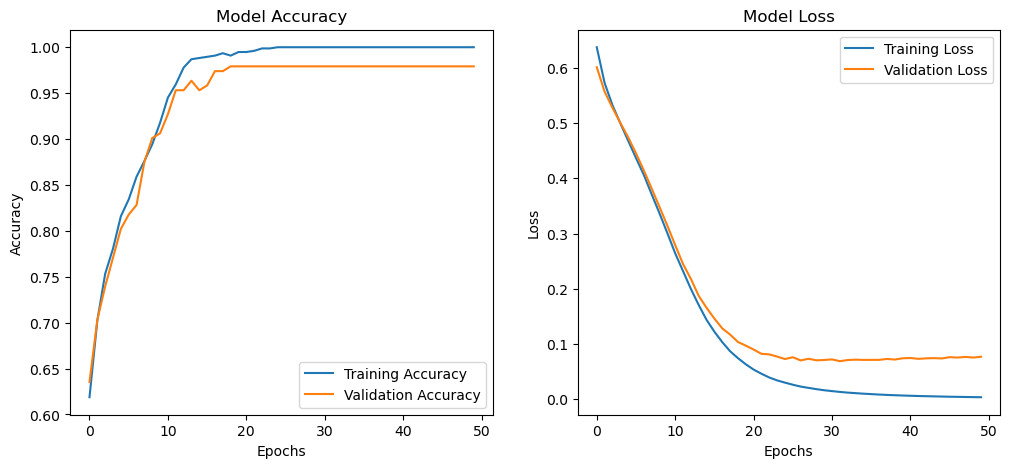

In [38]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Step 3: Compile the model with a custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjustable learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Step 6: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()



In [40]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9717 - loss: 0.1117 


[0.07680965214967728, 0.9791666865348816]

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# Handling Missing Values (NaN Prevention) +  Increased Epochs + Learning Rate Adjustment adam optimizer +splitting